In [130]:
from mnist import MNIST 
import numpy as np
from pylab import *
from matplotlib import colors
%matplotlib inline

mndata = MNIST('./data')

mndata.load_training()
img_side = 28
n_mnist_pixels = img_side*img_side

In [131]:
labels = mndata.train_labels

cluster_size = 10
train_inputs_idx = []
for idx in [0, 4]:
    label_idx = np.where(np.isin(labels,[idx]))[0][:cluster_size]
    train_inputs_idx.append(label_idx)

samples_idx = np.array(train_inputs_idx, dtype='int').flatten()
samples_idx.size

20

In [132]:
images = []
for sample_idx in samples_idx.flatten():
    images.append(mndata.train_images[sample_idx])

images = np.array(images, dtype='float')
images[images <= 127] = 0
images[images > 127] = 1
images.shape

(20, 784)

In [133]:
def simple_plot(T: list):
    T_arr = np.array(T, dtype=float)

    fig, axs = plt.subplots(1, 1, figsize=(50, 5), tight_layout=True)
    axs.plot(np.arange(T_arr.size), T_arr)


    plt.show()

In [134]:
from typing import Literal

def show_image(image: ndarray, cmap: Literal['bone', 'Greys'] = 'bone'):
    # figure(figsize=(15, 10))

    imshow(np.array(image),
        interpolation='none',
        aspect='equal',
        cmap=cmap,
        )

    axis("off")

    show()

In [135]:
def show_images_table(images_2d: ndarray, img_side: int = 28, row_size=10):
    column_size = int(images.shape[0] / row_size)

    shaped_images = images_2d.reshape(column_size, row_size, img_side, img_side)
    shaped_images = shaped_images.swapaxes(1, 2).reshape(column_size*img_side, row_size*img_side)

    figure(figsize=(15, 10))

    imshow(shaped_images,
           interpolation='none',
           aspect='equal',
           cmap='bone',
           )
    
    axis("off")

# show_images_table(images_2d=images)
images.shape

(20, 784)

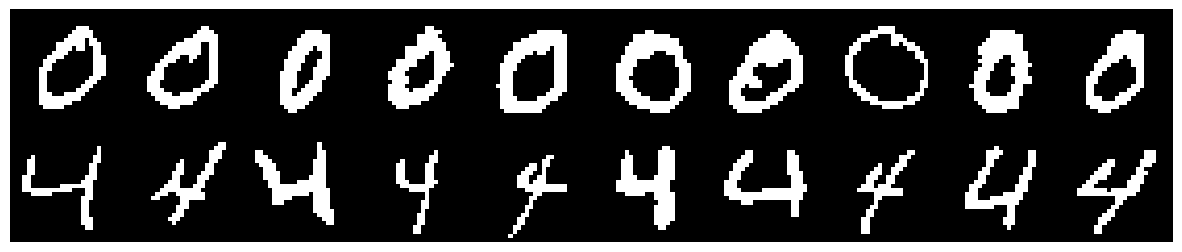

In [136]:
show_images_table(images_2d=images)

In [137]:
prec = 1e-30

I = np.zeros(n_mnist_pixels)
O = np.zeros(n_mnist_pixels)

W = np.random.rand(O.size, I.size) * 0.01

TR = np.zeros(n_mnist_pixels)
PO = np.zeros(n_mnist_pixels)

D = np.zeros(I.shape)

print(f'{W.max()=} {W.min()=} {np.mean(W)=}')
print(f'{TR.max()=} {TR.min()=} {np.mean(TR)=}')

# train
epoch_cnt = 100

n = 1

eps0 = 0.01
eps0_TR = 0.005

push_delta = 0.04

# train_images_idx = [10, 0]
train_images_idx = [0, 1, 2, 3, 4, 10, 11, 12, 13, 14]

for epoch_idx in range(epoch_cnt):
    eps = (epoch_cnt - epoch_idx) * eps0
    eps_TR = (epoch_cnt - epoch_idx) * eps0_TR

    for img_idx in train_images_idx:
        I = np.copy(images[img_idx])

        O = np.dot(W, I)  # I[np.newaxis].T ?

        O **= n

        O /= np.max(np.abs(O)) + prec

        # winner
        winners_idx = np.where(I > 0)
        loosers_idx = np.where(I <= 0)

        # threshold update
        TR[winners_idx] += (O[winners_idx] - PO[winners_idx] * TR[winners_idx]) * eps_TR

        PO[winners_idx] = O[winners_idx]

        # W update
        D.fill(0)
        D[winners_idx] = 1
        D[loosers_idx] = -push_delta

        W += (I - W * O[np.newaxis].T) * D[np.newaxis].T * eps


print(f'{W.max()=} {W.min()=} {np.mean(W)=} {np.median(W)=}')
print(f'{TR.max()=} {TR.min()=} {np.mean(TR)=} {np.median(W)=}')


W.max()=0.009999989725471533 W.min()=4.8073362980405325e-08 np.mean(W)=0.004999523944701871
TR.max()=0.0 TR.min()=0.0 np.mean(TR)=0.0


W.max()=1.4681816234328797 W.min()=-1.1737610809720984 np.mean(W)=-0.044493571568563046 np.median(W)=3.761939646844723e-45
TR.max()=1.011802717534125 TR.min()=0.0 np.mean(TR)=0.4308371981857779 np.median(W)=3.761939646844723e-45
